<a href="https://colab.research.google.com/github/Tudped/ML_samples/blob/main/K_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols = ["area", "perimeter", "compactness", "length", "width", "asy_coef", "groove_len", "class"]

In [3]:
df = pd.read_csv("seeds_dataset.txt", sep="\s+", names=cols)

In [4]:
df.head()

,area,perimeter,compactness,length,width,asy_coef,groove_len,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


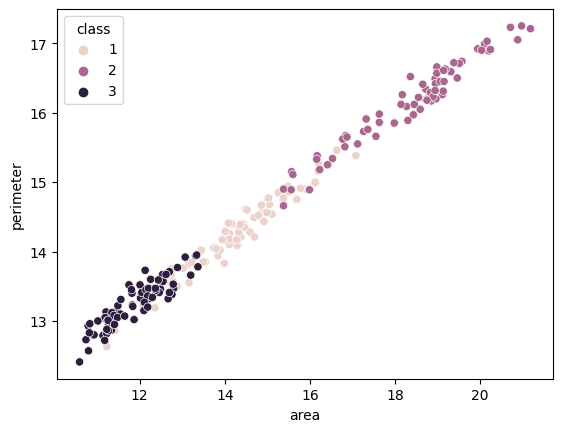

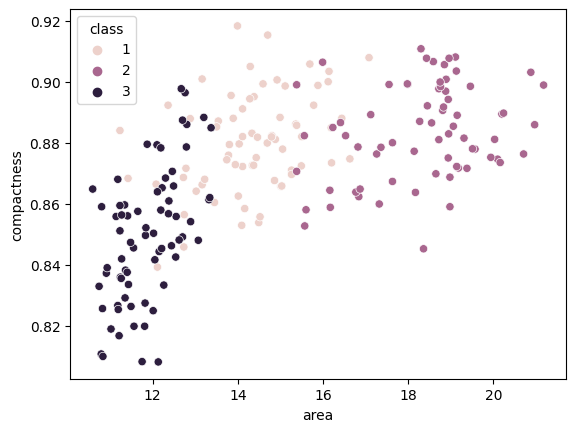

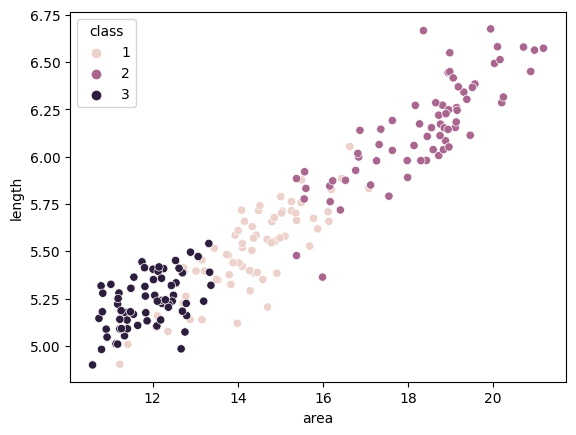

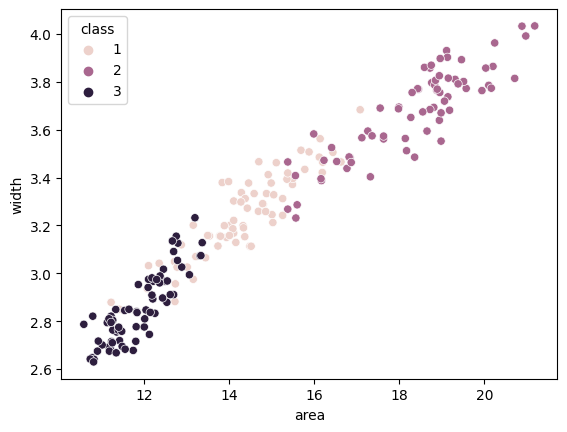

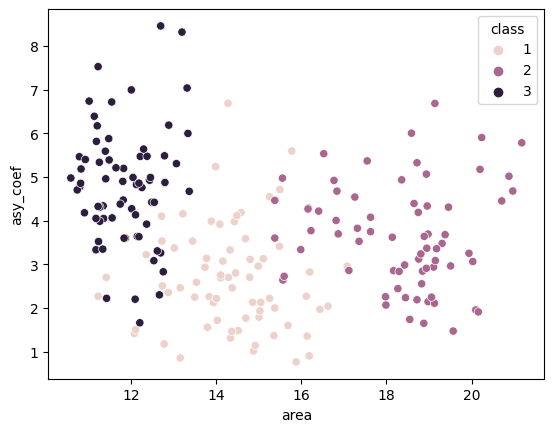

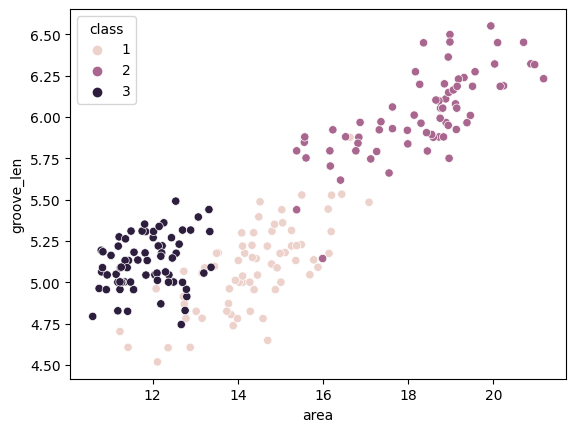

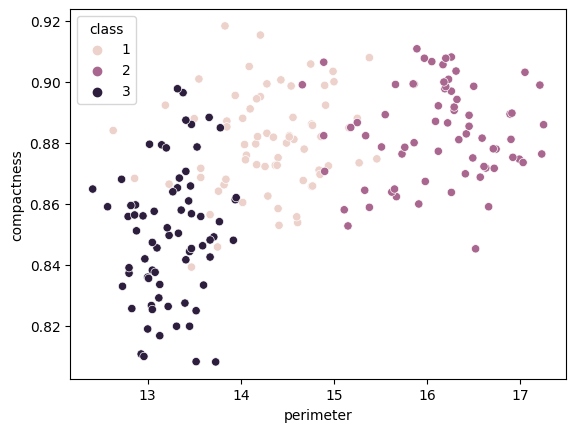

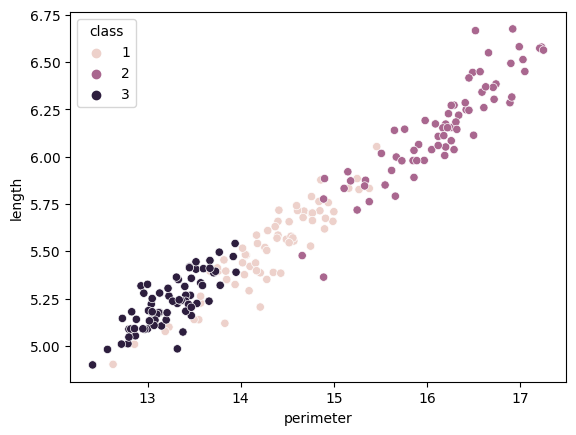

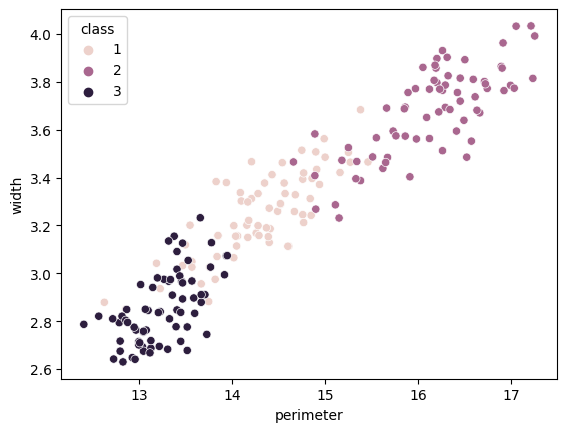

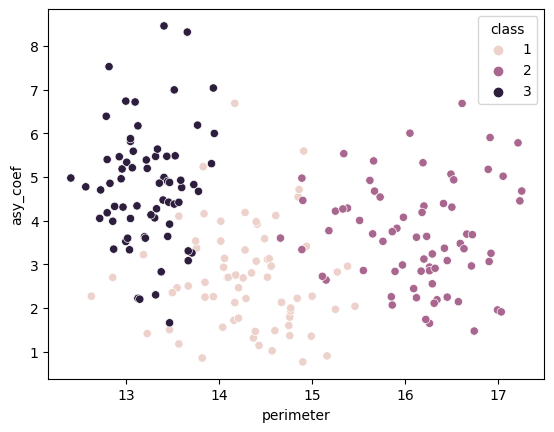

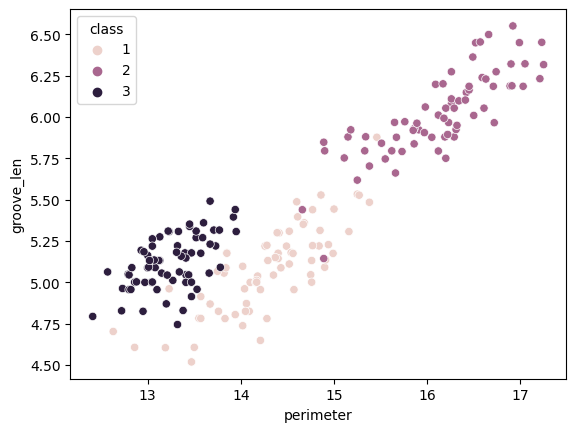

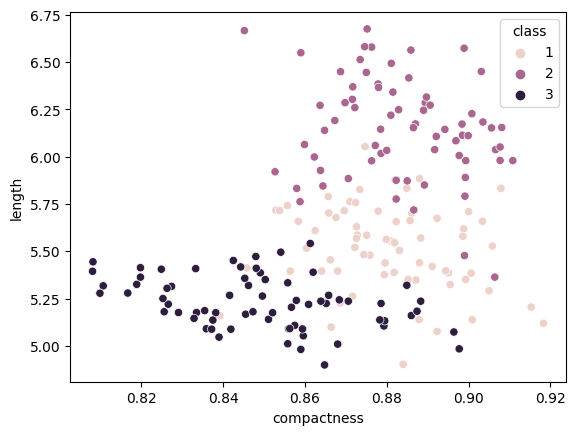

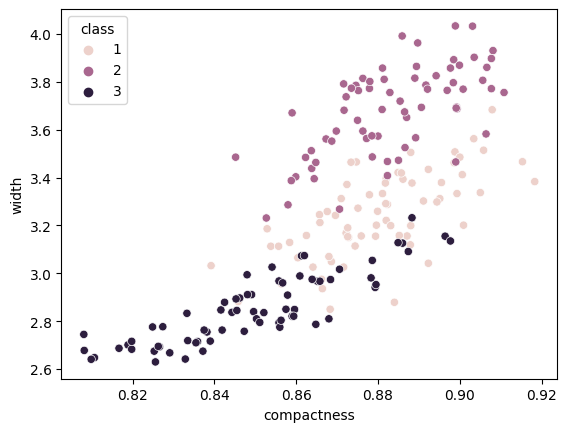

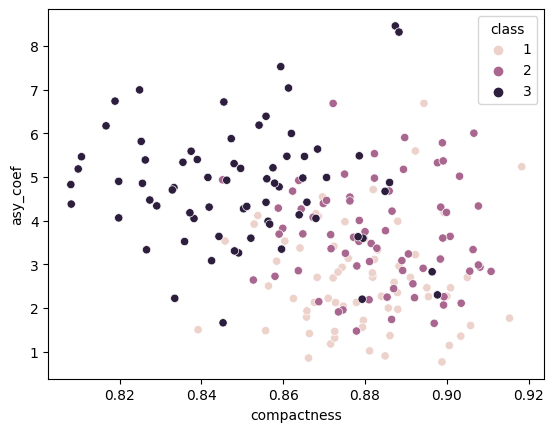

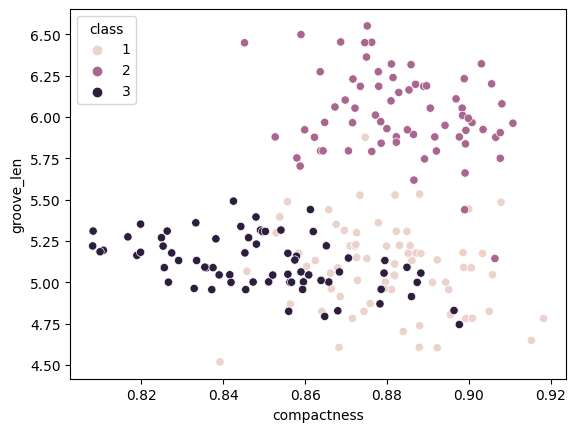

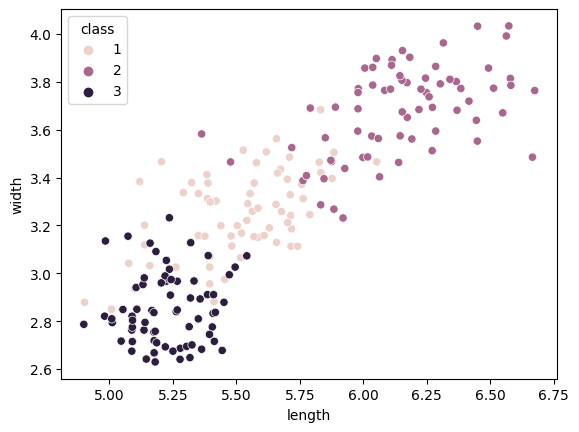

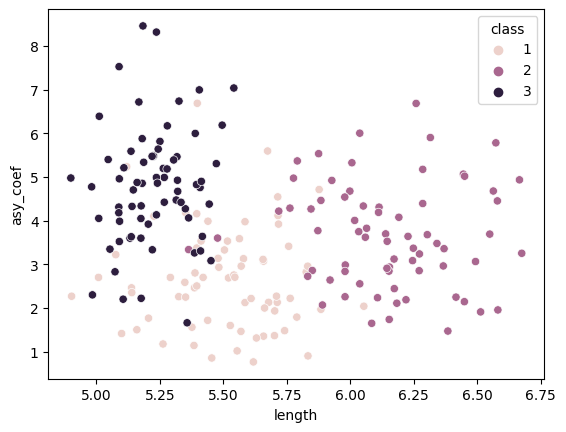

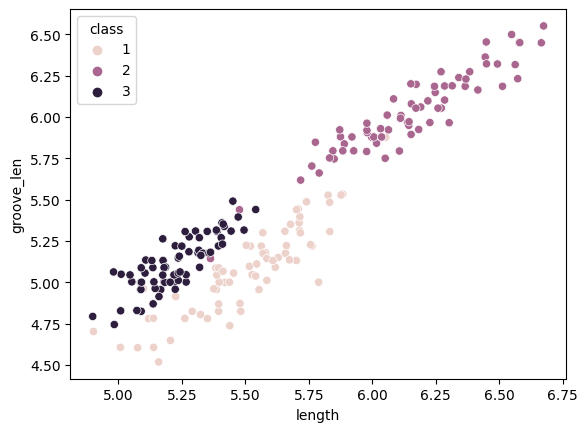

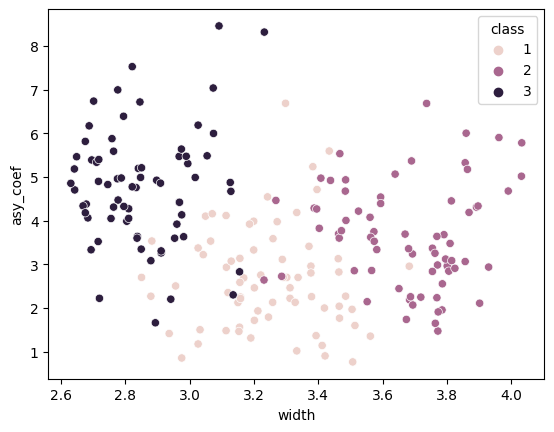

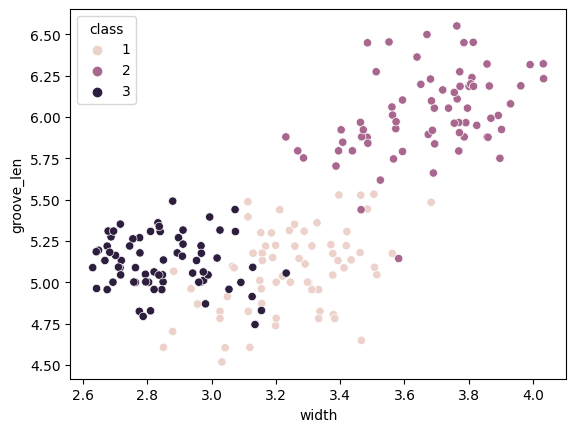

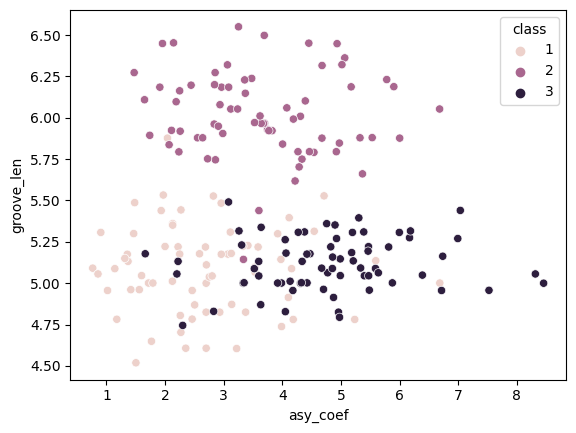

In [5]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_lab = cols[i]
    y_lab = cols[j]
    sns.scatterplot(x=x_lab, y=y_lab, data=df, hue='class')
    plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
x = "perimeter"
y = "asy_coef"
X = df[[x,y]].values

In [8]:
kmeans = KMeans(n_clusters = 3).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
# please data into cluster
clusters = kmeans.labels_

In [10]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0], dtype=int32)

In [11]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns=[x,y,"class"])

In [12]:
cluster_df.head()

,perimeter,asy_coef,class
0,14.84,2.221,2.0
1,14.57,1.018,2.0
2,14.09,2.699,2.0
3,13.94,2.259,2.0
4,14.99,1.355,2.0


[]

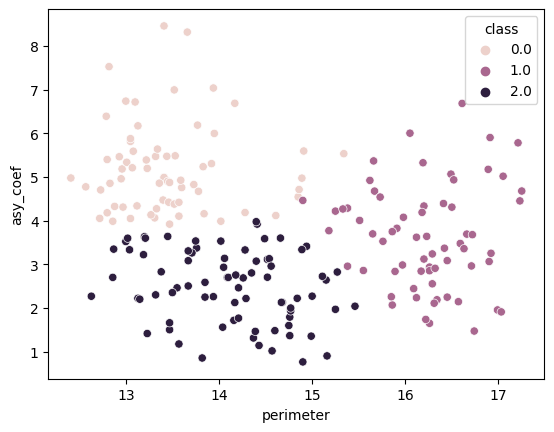

In [15]:
#K Mean classes
sns.scatterplot(x=x, y=y, data=cluster_df, hue='class')
plt.plot()

[]

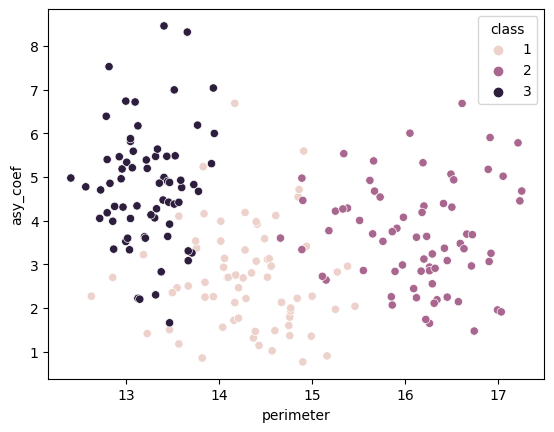

In [16]:
sns.scatterplot(x=x, y=y, data=df, hue='class')
plt.plot()

## Higher Dimension

In [28]:
X_all = df[cols[:-1]].values

In [30]:
kmeans_all = KMeans(n_clusters = 3).fit(X_all)
clusters_all = kmeans_all.labels_
cluster_all_df = pd.DataFrame(np.hstack((X_all, clusters_all.reshape(-1,1))), columns=df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

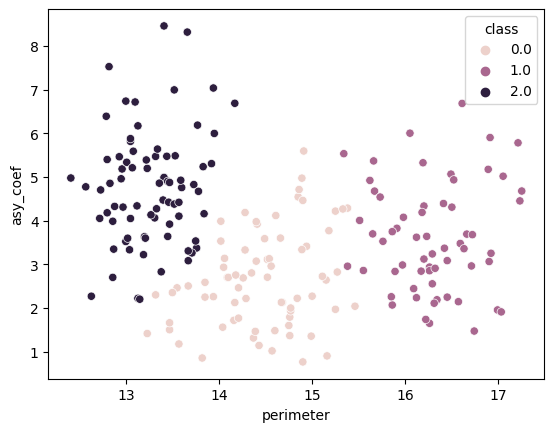

In [32]:
sns.scatterplot(x=x, y=y, data=cluster_all_df, hue='class')
plt.plot()

In [37]:
# Adjusted rand index
from sklearn.metrics import adjusted_rand_score, rand_score, silhouette_score
ari = adjusted_rand_score(df["class"], clusters_all)
ris = rand_score(df["class"], clusters_all)
ss = silhouette_score(X_all, clusters_all)
#dbs = davies_bouldin_score(feature, model.labels_)
print("Adjusted Rand Index: ", ari)
print("Rand Index: ", ris)
print("Silhouette_score: ", ss)

Adjusted Rand Index:  0.7166198557361053
Rand Index:  0.8743677375256322
Silhouette_score:  0.4719337319126887
